In [1]:
#Propagacion de la afinidad 

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

In [25]:
centers=[[1,1],[-1,-1],[1,-1]]
X, labels=make_blobs(n_samples=300,centers=centers,cluster_std=0.5,random_state=0)

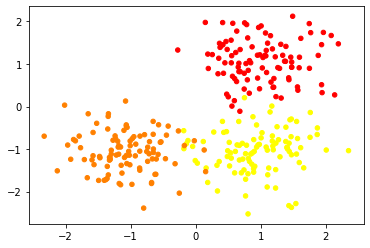

In [8]:
plt.scatter(X[:,0],X[:,1],c=labels,cmap="autumn",s=20)

In [10]:
af=AffinityPropagation(preference=-50).fit(X)

In [16]:
cluster_centers_ids=af.cluster_centers_indices_

In [17]:
labels=af.labels_

In [18]:
n_clust=len(cluster_centers_ids)

In [19]:
n_clust

3

In [47]:
def report_affinity_propagation(X):
    af=AffinityPropagation(preference=-50).fit(X)
    cluster_centers_ids=af.cluster_centers_indices_
    n_clust=len(cluster_centers_ids)
    clust_labels=af.labels_
    print("Numero estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels,clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels,clust_labels))
    print("V-meassure: %0.3f"%metrics.v_measure_score(labels,clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels,clust_labels))
    print("Informacion mutua ajustada %0.3f"%metrics.adjusted_mutual_info_score(labels,clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X,labels,metric="sqeuclidean"))

    plt.figure(figsize=(16,9))
    plt.clf()

    colors=cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust),colors):
        class_members=(clust_labels==k)
        clust_center=X[cluster_centers_ids[k]]
        plt.plot(X[class_members,0],X[class_members,1],col +".")
        plt.plot(clust_center[0],clust_center[1],'o',markerfacecolor=col,markeredgecolor='k',markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]],[clust_center[1],x[1]],col)

    plt.title("Numero estimado de clusters %d"%n_clust)
    plt.show()

Numero estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-meassure: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada 0.871
Coeficiente de la silueta: 0.735


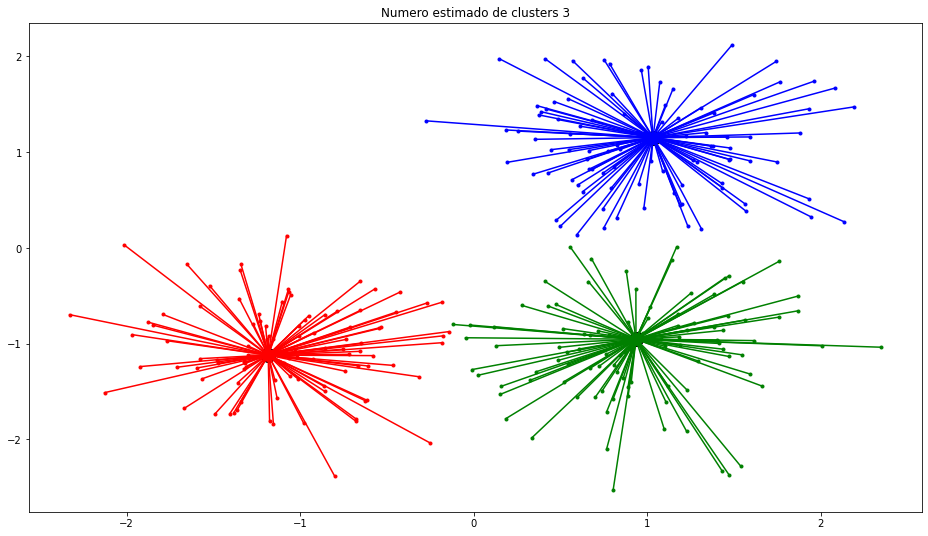

In [48]:
report_affinity_propagation(X)